<a href="https://colab.research.google.com/github/VAbhishek12/excelr/blob/main/SVM/SVM(forest_fire).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: import a file using colab

from google.colab import files
uploaded = files.upload()


Saving forestfires.csv to forestfires.csv


In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv("forestfires.csv")
df.shape

(517, 31)

In [4]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-7-52e2c3ca42f8>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: xlabel='area', ylabel='count'>

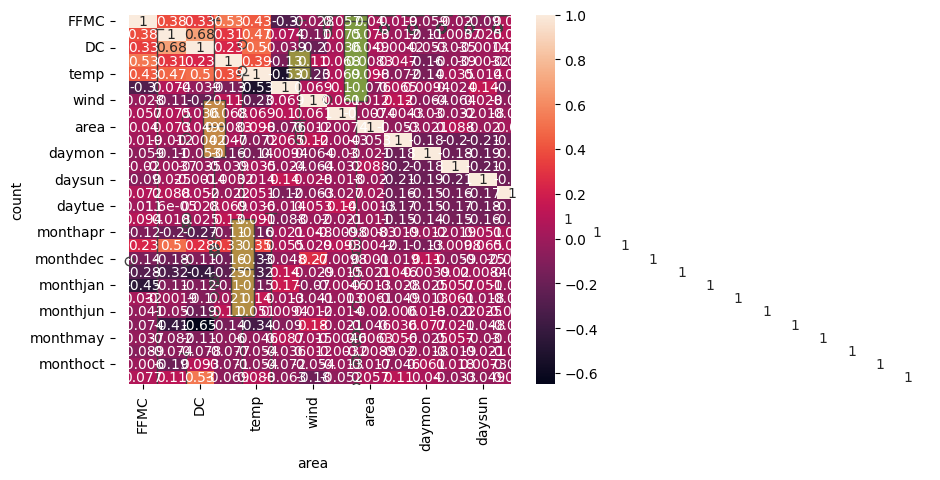

In [7]:
# prompt: do saome eda on above df

# Check for missing values
df.isnull().sum()

# Check for duplicate rows
df.duplicated().sum()

# Check for outliers
import seaborn as sns
sns.boxplot(data=df)

# Check for correlations between features
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

# Check for the distribution of the target variable
sns.countplot(x='area', data=df)


In [40]:
# importing all the libraries..
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [9]:
df.isnull().any()

month            False
day              False
FFMC             False
DMC              False
DC               False
ISI              False
temp             False
RH               False
wind             False
rain             False
area             False
dayfri           False
daymon           False
daysat           False
daysun           False
daythu           False
daytue           False
daywed           False
monthapr         False
monthaug         False
monthdec         False
monthfeb         False
monthjan         False
monthjul         False
monthjun         False
monthmar         False
monthmay         False
monthnov         False
monthoct         False
monthsep         False
size_category    False
dtype: bool

In [14]:
df['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [15]:
df.value_counts()

month  day  FFMC  DMC    DC     ISI   temp  RH  wind  rain  area    dayfri  daymon  daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  size_category
aug    fri  91.0  166.9  752.6  7.1   25.9  41  3.6   0.0   0.00    1       0       0       0       0       0       0       0         1         0         0         0         0         0         0         0         0         0         0         small            2
       sat  93.7  231.1  715.1  8.4   18.9  64  4.9   0.0   0.00    0       0       1       0       0       0       0       0         1         0         0         0         0         0         0         0         0         0         0         small            2
       sun  91.4  142.4  601.4  10.6  19.8  39  5.4   0.0   0.00    0       0       0       1       0       0       0       0         1         0         0         0         0         0         0         0         0 

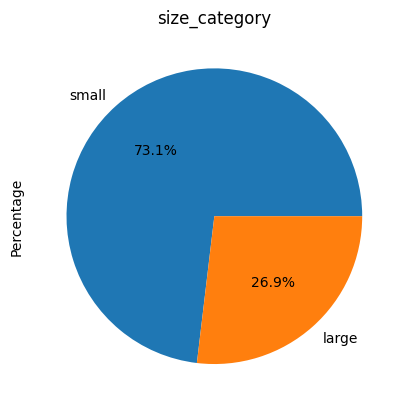

In [19]:
import matplotlib.pyplot as plt

df['size_category'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('size_category')
plt.ylabel('Percentage')
plt.show()

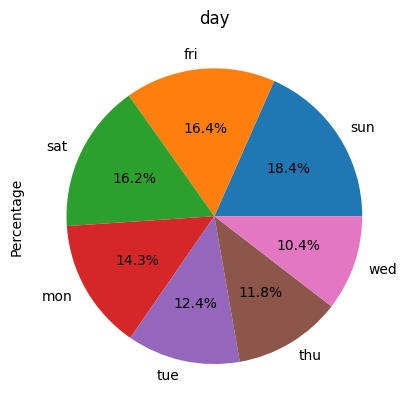

In [20]:

df['day'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('day')
plt.ylabel('Percentage')
plt.show()

<ipython-input-21-f3bb71e55150>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


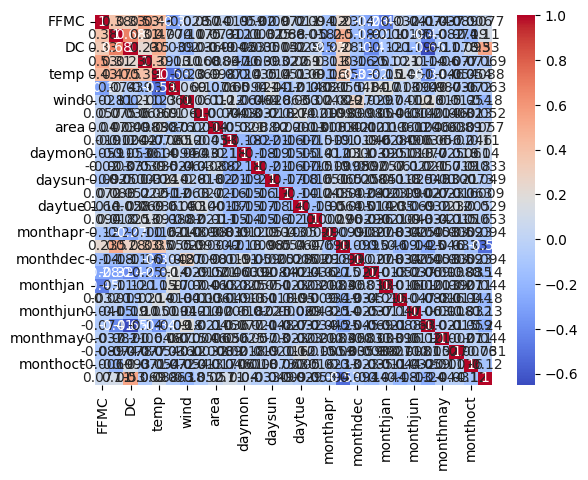

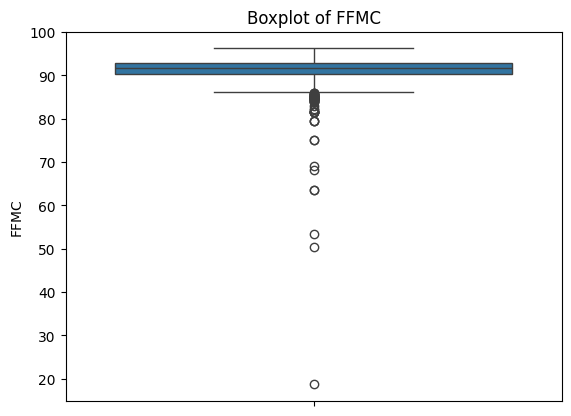

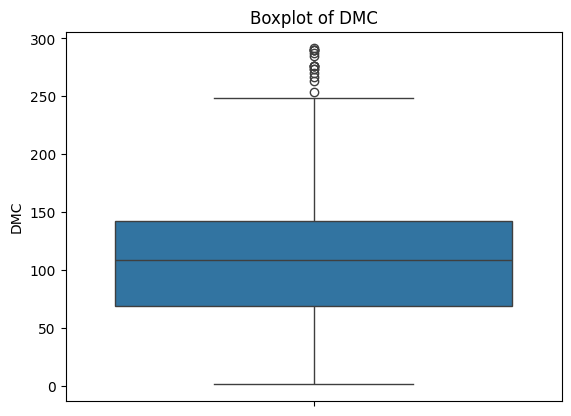

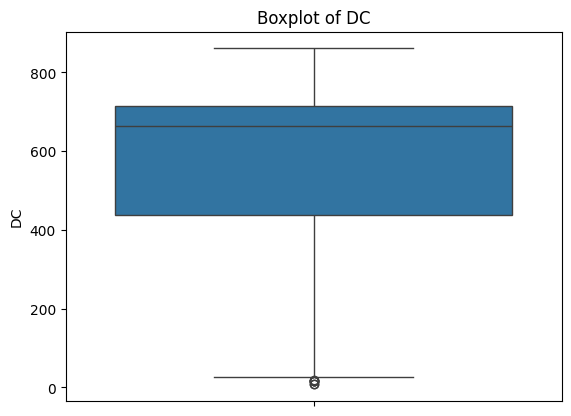

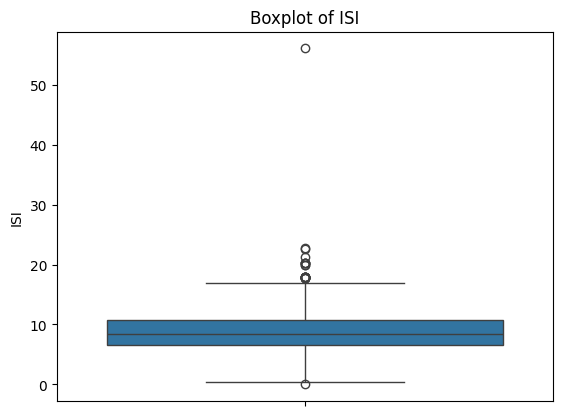

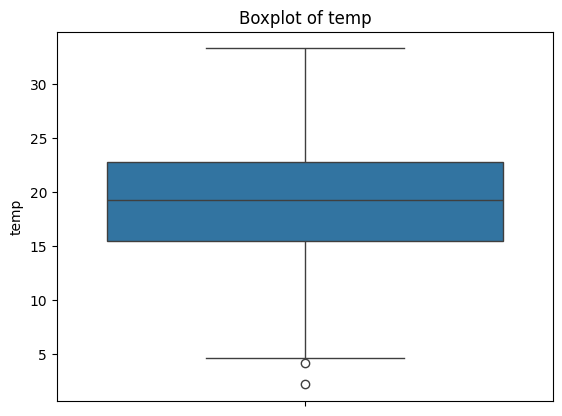

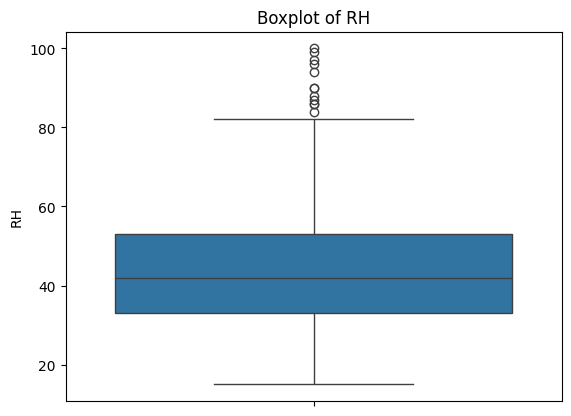

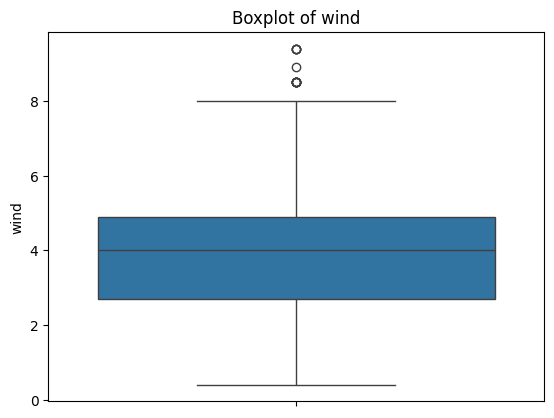

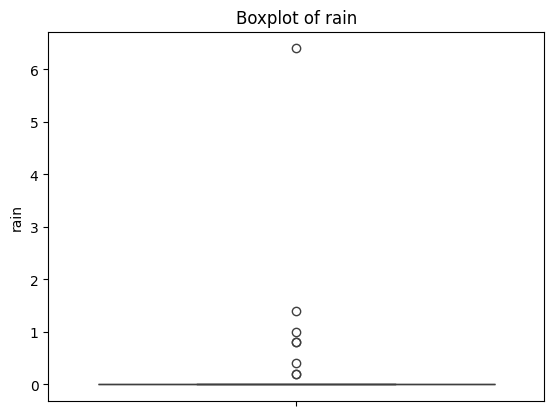

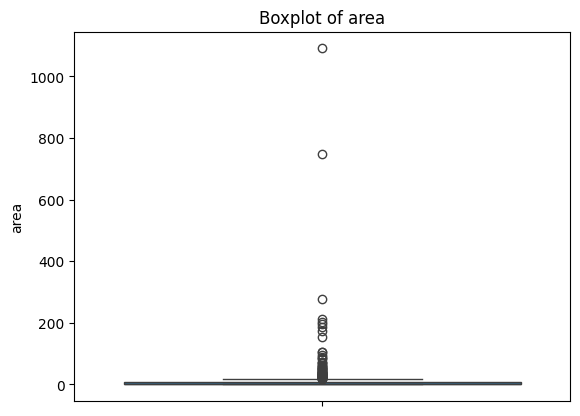

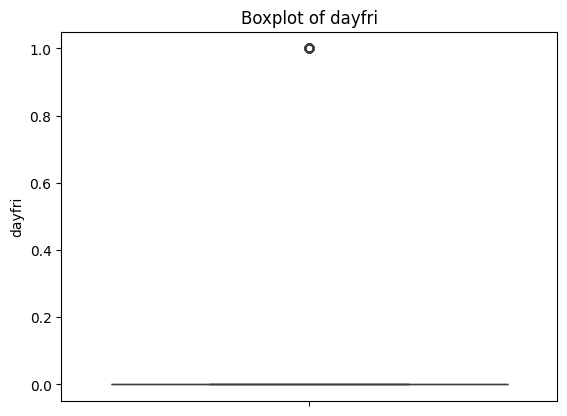

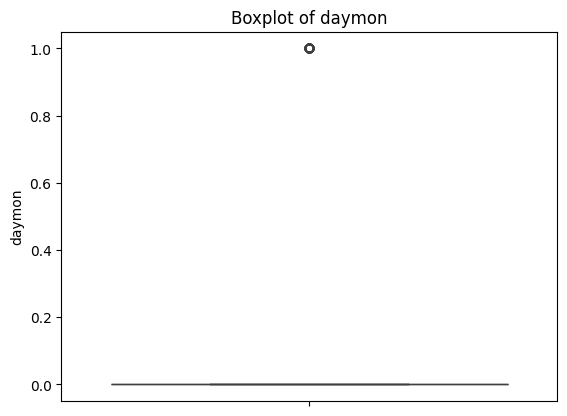

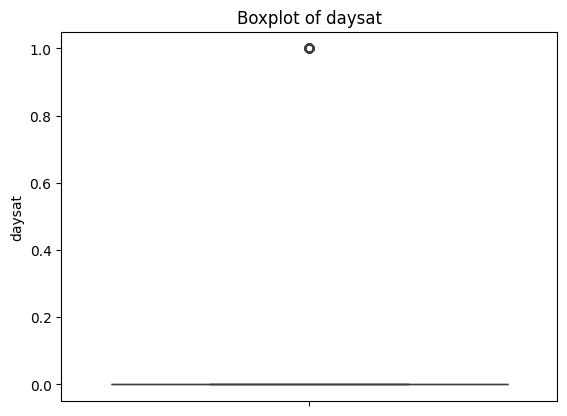

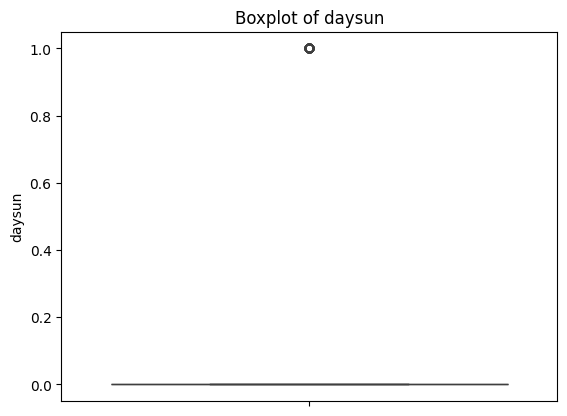

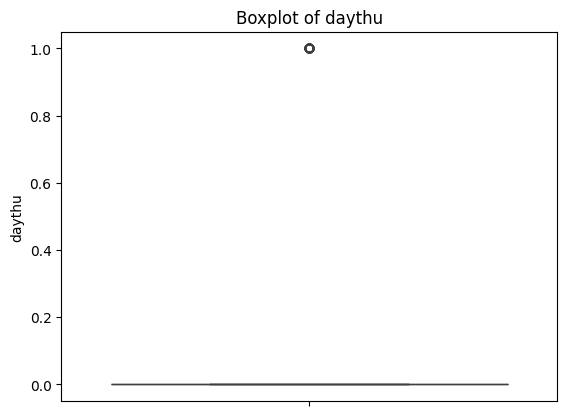

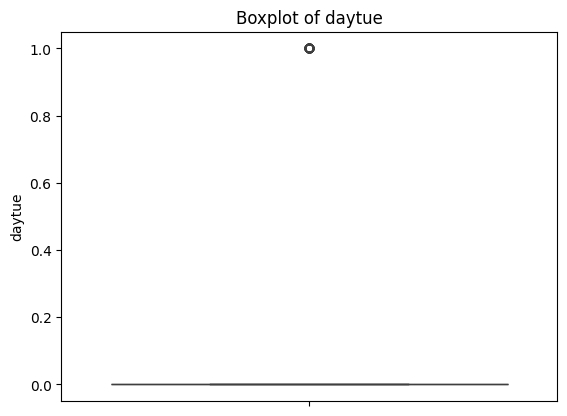

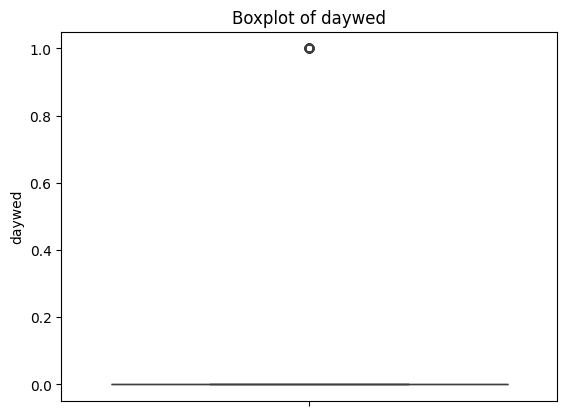

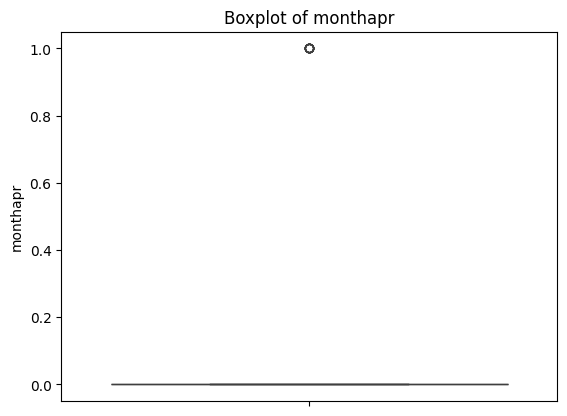

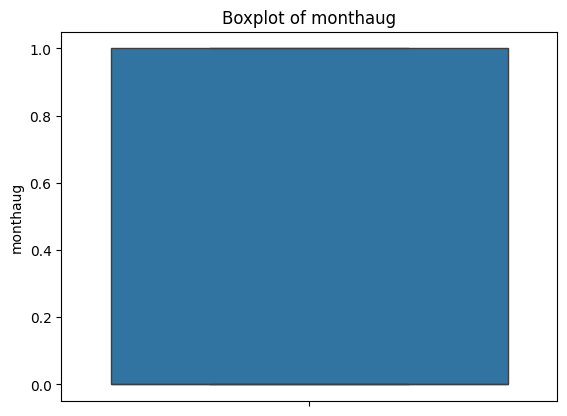

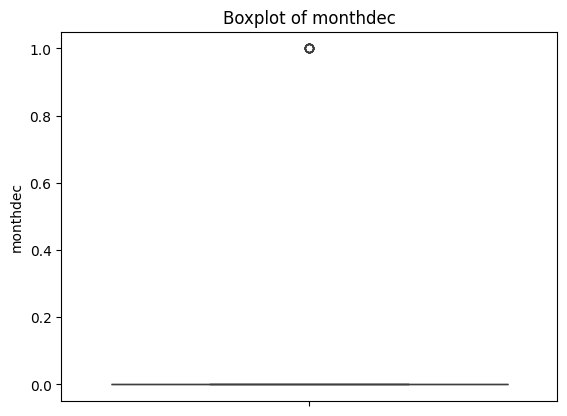

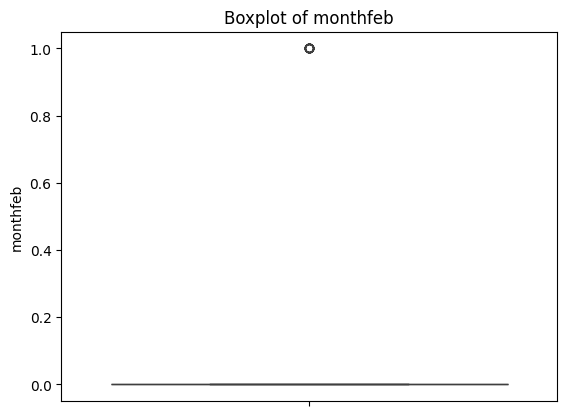

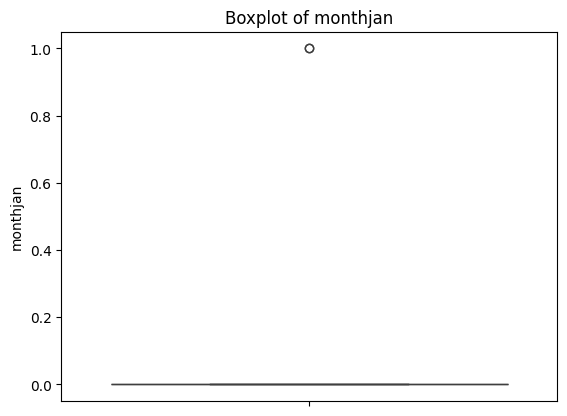

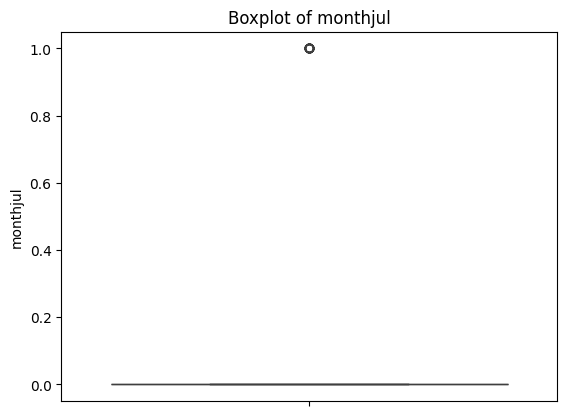

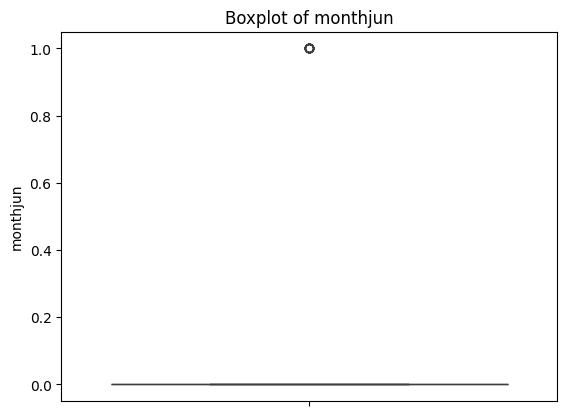

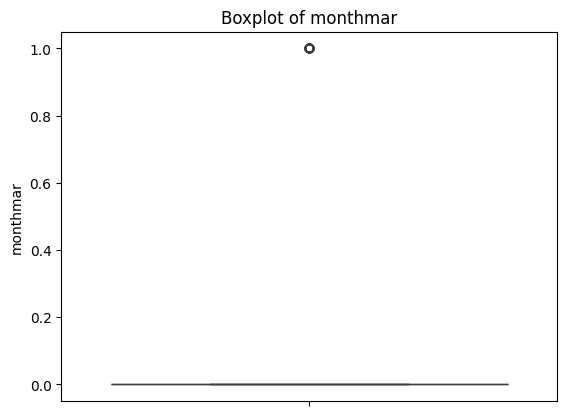

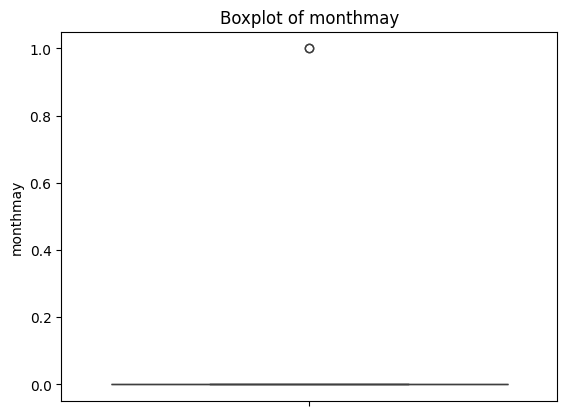

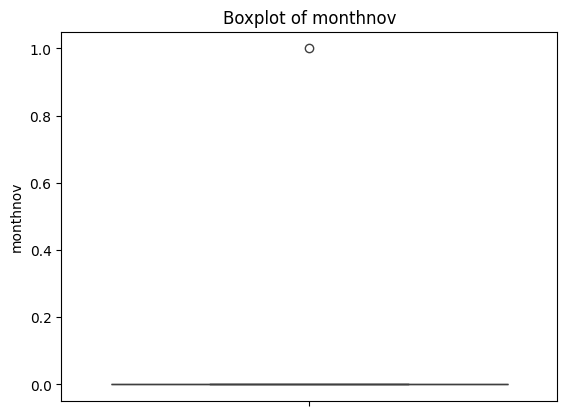

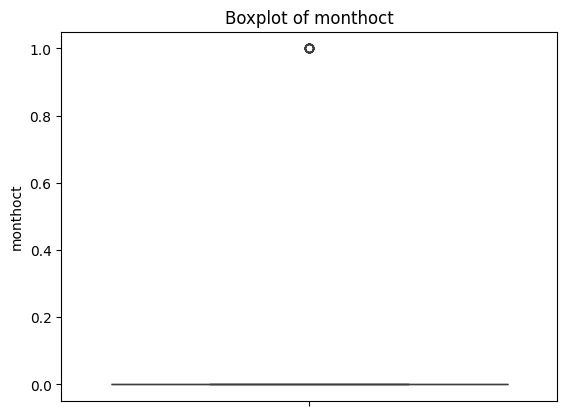

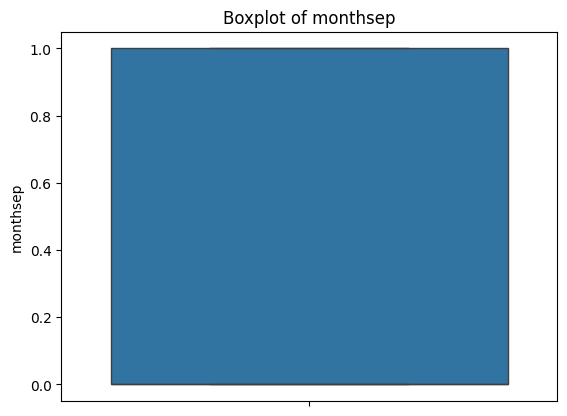

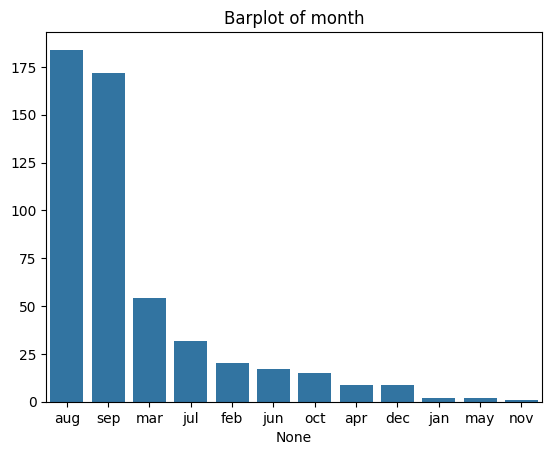

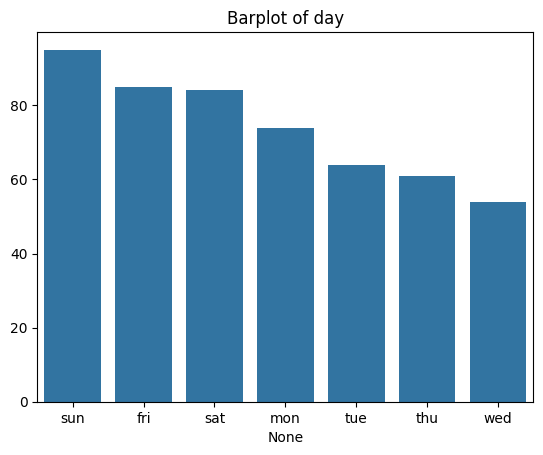

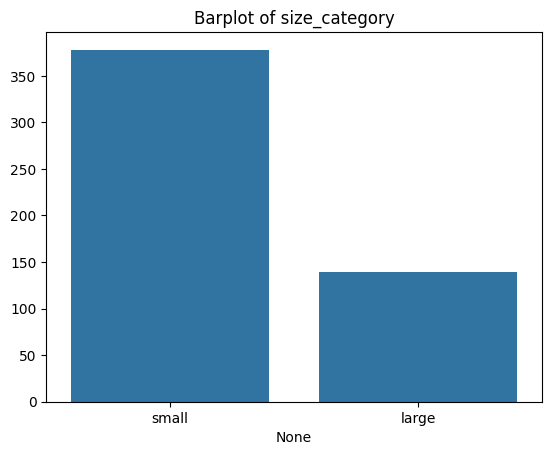

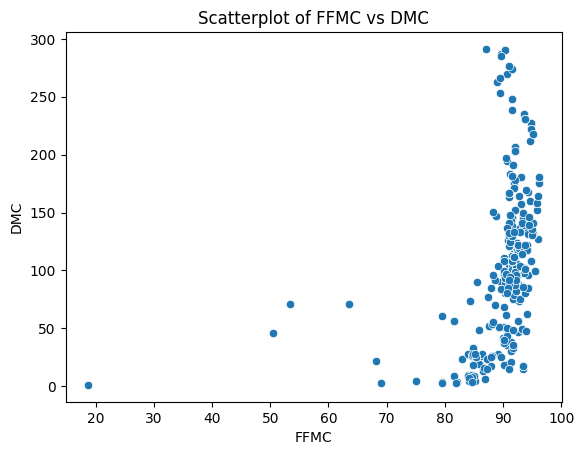

In [21]:
import seaborn as sns
# 1) **Correlation Matrix**

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

# 2) **Boxplots for Numerical Features**

numerical_features = df.select_dtypes(include=["int64", "float64"])

for column in numerical_features:
  sns.boxplot(y=df[column])
  plt.title(f"Boxplot of {column}")
  plt.show()

# 3) **Barplots for Categorical Features**

categorical_features = df.select_dtypes(include=["object"])

for column in categorical_features:
  sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values)
  plt.title(f"Barplot of {column}")
  plt.show()

# 4) **Scatterplot for Numerical Features**


sns.scatterplot(x="FFMC", y="DMC", data=df)
plt.title("Scatterplot of FFMC vs DMC")
plt.show()

# 5) **Lineplot for Temporal Data**

if "date" in df.columns:
  df["date"] = pd.to_datetime(df["date"])
  sns.lineplot(x="date", y="temperature", data=df)
  plt.title("Lineplot of Temperature over Time")
  plt.show()

In [22]:
Y =  ["size_category"]
X = df.iloc[:,2:30]
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
# prompt: label encode all object variables

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over the object columns
for col in df.select_dtypes(include='object'):
  # Fit the encoder to the data
  le.fit(df[col])
  # Transform the data
  df[col] = le.transform(df[col])

# Print the transformed dataframe
print(df)


     month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  \
0        7    0  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...   
1       10    5  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...   
2       10    2  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...   
3        7    0  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...   
4        7    3  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...   
..     ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...   
512      1    3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...   
513      1    3  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...   
514      1    3  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...   
515      1    2  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...   
516      9    5  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1     

In [28]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
#define x&y

X = df.iloc[:,0:31]
Y = df['size_category']

In [38]:
# Splitting the data into training and test dataset

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)



In [44]:
#model building by using SVM...
clf = SVC()
clf.fit(X_train , Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, Y_pred)

Accuracy = 72.43589743589743


array([[  3,  43],
       [  0, 110]])

In [45]:
Y_pred=clf.predict(X_test)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [46]:
from sklearn.svm import SVC, LinearSVC

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
linear_svm = LinearSVC()
linear_svm.fit(X_train_scaled, Y_train.values.ravel())
linear_predictions = linear_svm.predict(X_test_scaled)
linear_accuracy = accuracy_score(Y_test, linear_predictions)
print(f"Linear Kernel Accuracy: {linear_accuracy:.2f}")

Linear Kernel Accuracy: 1.00


In [49]:
poly_svm = SVC(kernel='poly', degree=3)  # You can adjust the degree parameter
poly_svm.fit(X_train_scaled, Y_train)
poly_predictions = poly_svm.predict(X_test_scaled)
poly_accuracy = accuracy_score(Y_test, poly_predictions)
print(f"Polynomial Kernel Accuracy: {poly_accuracy:.2f}")

Polynomial Kernel Accuracy: 0.93


In [50]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train_scaled, Y_train)
rbf_predictions = rbf_svm.predict(X_test_scaled)
rbf_accuracy = accuracy_score(Y_test, rbf_predictions)
print(f"RBF Kernel Accuracy: {rbf_accuracy:.2f}")

RBF Kernel Accuracy: 0.98


In [51]:
sigmoid_svm = SVC(kernel='sigmoid')
sigmoid_svm.fit(X_train_scaled, Y_train)
sigmoid_predictions = sigmoid_svm.predict(X_test_scaled)
sigmoid_accuracy = accuracy_score(Y_test, sigmoid_predictions)
print(f"Sigmoid Kernel Accuracy: {sigmoid_accuracy:.2f}")

Sigmoid Kernel Accuracy: 1.00


In [52]:
kernels = ['Linear', 'Polynomial', 'RBF', 'Sigmoid']
accuracies = [linear_accuracy, poly_accuracy, rbf_accuracy, sigmoid_accuracy]

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

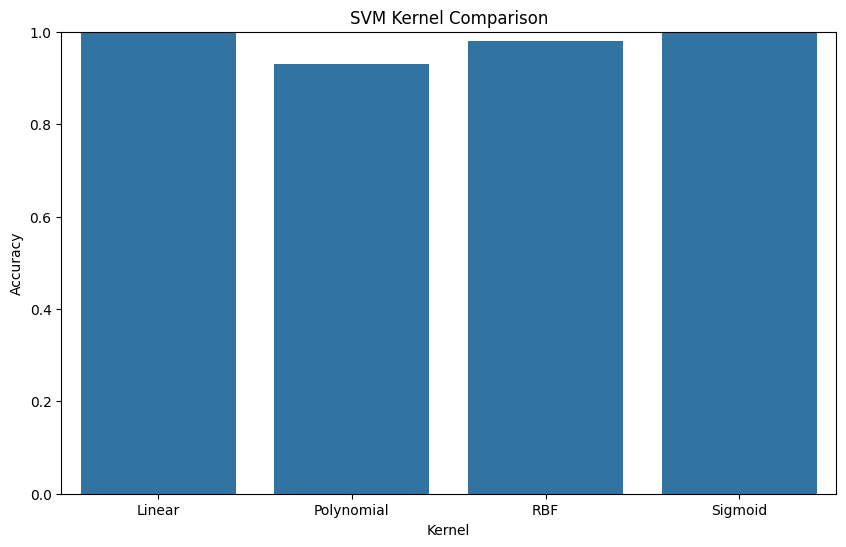

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x=kernels, y=accuracies)
plt.title('SVM Kernel Comparison')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()